# Indexing and SQLite

In [1]:
import sqlite3

In [3]:
db = sqlite3.connect('IMDB.sqlite')
db

In [4]:
# new database 

db = sqlite3.connect('School.sqlite')
db

In [5]:
# create cursor object
cur = db.cursor()
cur

In [6]:
# create new table
sql_query = 'create table Student(RollNo int Primary Key,Name Text,Age int)'

# execute this query
cur.execute(sql_query)

In [8]:
cur.execute('Insert into Student values(101,"Aman",20)')

In [9]:
# refect change int database or dbbroweser
db.commit()

In [10]:
cur.execute('Insert into Student values(102,"Akash",21)')
db.commit()

In [11]:
# close connetiom
db.close()

In [13]:
cur.execute('Insert into Student values(102,"Akash",21)')
db.commit()

ProgrammingError: Cannot operate on a closed database.

### Assignment create Employe Table

In [2]:
db = sqlite3.connect('Employee.sqlite')
cur = db.cursor()


In [3]:
cur.execute('create table EmployeeDetail(Employee_id int Primary Key, Name varchar(100), Age int, Department varchar(100), Salary int)')
db.commit()

OperationalError: table EmployeeDetail already exists

In [7]:
cur.execute('insert into EmployeeDetail values(100,"Rishav",25,"Marketing",50000),(101,"Abhishek",26,"Operation",60000),(102,"Rishav",24,"Human Resource",750000)')

db.commit()

In [31]:
cur.execute('delete from EmployeeDetail where Employee_id = 101')

db.commit()

In [32]:
emp_id = 102
cur.execute('delete from EmployeeDetail where Employee_id = ?',(emp_id,))

db.commit()

In [6]:
cur.execute('delete from EmployeeDetail where Employee_id = 100')

db.commit()

In [10]:
cur.execute('select Employee_id from EmployeeDetail where Department = "Marketing"')
for i in cur:
    print(i)

(100,)


In [12]:
cur.execute('select Department,count(Employee_id) from EmployeeDetail group by Department')
for i in cur:
    print(i)

('Human Resource', 1)
('Marketing', 1)
('Operation', 1)


#### ma'am 

In [33]:
db = sqlite3.connect('School.sqlite')
cur = db.cursor()


In [36]:
cur.execute('Insert into Student values(103,"Abid",21)')
db.commit()

OperationalError: database is locked

In [28]:
# passing variable to query
roll = 105
name = "Achyut"
age = 20
cur.execute('Insert into Student values(?,?,?)',(roll,name,age))
db.commit()

OperationalError: database is locked

In [4]:
values = [(105,"Nidhi",20),(106,"Ayushi",21),(107,"Anshuman",20)]
cur.executemany('Insert into Student values(?,?,?)',values)
db.commit()

In [6]:
# update age column
cur.execute('update student set Age = 22')

In [7]:
db.commit()

In [9]:
cur.execute('update student set Age = 21 where RollNo = 102')

In [11]:
db.commit()

In [13]:
new_age = 15
cur.execute('update student set Age = ? where RollNo = 102',(new_age,))

In [14]:
db.commit()

In [35]:
# fetch data

cur.execute('Select * from Student')

In [36]:
for row in cur:
    print(row)

(101, 'Aman', 22)
(102, 'Akash', 15)
(103, 'Abid', 22)
(104, 'Achyut', 22)
(105, 'Nidhi', 22)
(106, 'Ayushi', 22)
(107, 'Anshuman', 22)


In [40]:
# fetchone() || fetchmany() || fectchall()
cur.execute('Select * from Student')
# fetchone()
print(cur.fetchone())
print(cur.fetchone())
print(cur.fetchone())

# fetchmany()
print(cur.fetchmany(3))

# fectchall()
print(cur.fetchall())

(101, 'Aman', 22)
(102, 'Akash', 15)
(103, 'Abid', 22)
[(104, 'Achyut', 22), (105, 'Nidhi', 22), (106, 'Ayushi', 22)]
[(107, 'Anshuman', 22)]


### SQLite with Pandas

In [14]:
import sqlite3
import pandas as pd

db = sqlite3.connect('School.sqlite')

In [16]:
data = pd.read_sql_query('select * from student',db)
data

,RollNo,Name,Age
0,101,Aman,22
1,102,Akash,15
2,103,Abid,22
3,104,Achyut,22
4,105,Nidhi,22
5,106,Ayushi,22
6,107,Anshuman,22


In [20]:
data[data["Age"] == 15]

,RollNo,Name,Age
1,102,Akash,15


In [22]:
data = pd.DataFrame([[201,"Aman","English",20000],[202,"Nikita","Maths",25000],[203,"Rohan","Science",27000]],columns = ["ID","Name","Course","Salary"])
data

,ID,Name,Course,Salary
0,201,Aman,English,20000
1,202,Nikita,Maths,25000
2,203,Rohan,Science,27000


In [24]:
data.to_sql("Faculty",db)

ValueError: Table 'Faculty' already exists.

In [27]:
data = pd.read_sql_query('select * from student',db)
data["Addres"] = "Test"
data

,RollNo,Name,Age,Addres
0,101,Aman,22,Test
1,102,Akash,15,Test
2,103,Abid,22,Test
3,104,Achyut,22,Test
4,105,Nidhi,22,Test
5,106,Ayushi,22,Test
6,107,Anshuman,22,Test


In [28]:
# updaate to database
data.to_sql("Student",db,if_exists = "replace")

# ***Assignment IMDB DataBase***

### count each genra and count movies?


In [2]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
cur = db.cursor()

In [3]:
cur.execute('select genre,count(Movie_id) from genre group by genre ')
lis = []
for i in cur:
    lis.append(i)
    
print(lis[1:])

[('Action', 33), ('Adventure', 43), ('Animation', 13), ('Biography', 21), ('Comedy', 31), ('Crime', 11), ('Drama', 77), ('Family', 3), ('Fantasy', 7), ('History', 6), ('Horror', 2), ('Music', 3), ('Musical', 1), ('Mystery', 7), ('Romance', 13), ('Sci-Fi', 18), ('Sport', 3), ('Thriller', 14), ('War', 2), ('Western', 2)]


### Print Rating Of The Movies

In [4]:
earn_sum = cur.execute('select Movie_id,Domestic + Worldwide from earning ')
lis = []
for i in earn_sum:
    lis.append(i)
    
res = dict(lis) #converting dict
max_earn = max(res.values()) # maximum earn

movie_id = max(res.items(), key=lambda x : x[1])[0] # getting max value, keys(movies_id)

rating = cur.execute('select rating from IMDB where Movie_id = ?',(movie_id,)) # getting ratting based on movies_id
for i in rating:
    print(i[0])

8.1


### IMDB Most Voted Movies

In [5]:
cur.execute('select max(TotalVotes) from IMDB')
for i in cur:
    max_votes = i[0]
    
cur.execute('select Title,Rating from IMDB where TotalVotes = ?',(max_votes,))
for i in cur:
    print(i[0],i[1])

Inception (2010) 8.8


### IMDB Running Time

In [8]:
cur.execute('select Runtime from IMDB')
res = cur.execute('SELECT MAX(CAST(SUBSTRING(Runtime,5,LEN(Runtime)-4) AS INT)) FROM IMDB WHERE Runtime LIKE "% min"')
for i in res:
    print(i)

OperationalError: no such function: LEN

In [16]:
earn_sum = cur.execute('select IMDB.Title,earning.Domestic + earning.Worldwide - IMDB.Budget from earning Inner join IMDB on earning.Movie_id == IMDB.Movie_id ')
lis = []
for i in earn_sum:
    lis.append(i)
    
res = dict(lis) #converting dict


movie_name = max(res.items(), key=lambda x : x[1])[0] # getting max value, keys(movies_id)
movie_name

'Star Wars: The Force Awakens\xa0(2015)'

In [21]:
cur.execute('select Title,min(Budget) from IMDB')
for i in cur:
    print(i[0],i[1])

Short Term 12 (2013) 1000000.0


In [47]:
earn_sum = cur.execute('select IMDB.Title,earning.Domestic + earning.Worldwide from earning ')
lis = []
for i in earn_sum:
    lis.append(i)
    
lis

OperationalError: no such column: IMDB.Title

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

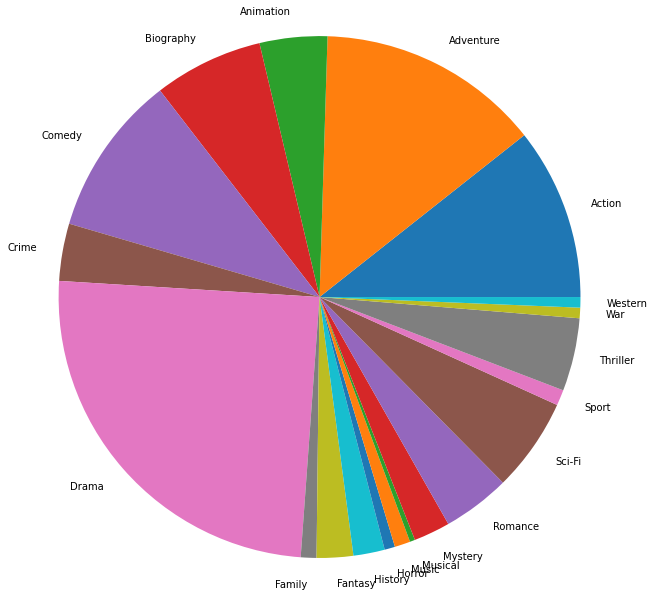

In [44]:
cur.execute('select genre,count(Movie_id) from genre group by genre ')
lis = []
for i in cur:
    lis.append(i)
    
res = dict(lis)
del res['']
res

s = sum(res.values())
name = []
per = []
for k, v in res.items():
    pct = v * 100.0 / s
    name.append(k)
    per.append(round(pct,2))
    
name = np.array(name)
per = np.array(per)

plt.pie(per,labels = name,radius= 3)
plt.show()

In [69]:
cur.execute('select IMDB.Title,genre.genre,IMDB.Rating from genre inner join IMDB on genre.Movie_id == IMDB.Movie_id ')
rate = []
genre = []
title = []
for i in cur:
    title.append(i[0])
    genre.append(i[1])
    rate.append(i[2])

res = []
for a,b,c in zip(title,genre,rate):
    if c >= 8 and 'Sci-Fi' in b or 'Mystery' in b:
        res.append([a,b,c])
#     res.append([a,b,c])
    
res


[['Shutter Island\xa0(2010)', 'Mystery', 8.1],
 ['Arrival\xa0(2016)', 'Mystery', 8],
 ['Ex Machina\xa0(2014)', 'Mystery', 7.7],
 ['The Avengers\xa0(2012)', 'Sci-Fi', 8.1],
 ['Arrival\xa0(2016)', 'Sci-Fi', 8],
 ['Gone Girl\xa0(2014)', 'Mystery', 8.1],
 ['Guardians of the Galaxy\xa0(2014)', 'Sci-Fi', 8.1],
 ['Her\xa0(2013)', 'Sci-Fi', 8],
 ['Inception\xa0(2010)', 'Sci-Fi', 8.8],
 ['Interstellar\xa0(2014)', 'Sci-Fi', 8.6],
 ['Mad Max: Fury Road\xa0(2015)', 'Sci-Fi', 8.1],
 ['Prisoners\xa0(2013)', 'Mystery', 8.1],
 ['The Girl with the Dragon Tattoo\xa0(2011)', 'Mystery', 7.8],
 ['The Hunger Games: Catching Fire\xa0(2013)', 'Mystery', 7.6],
 ['The Martian\xa0(2015)', 'Sci-Fi', 8],
 ['X-Men: Days of Future Past\xa0(2014)', 'Sci-Fi', 8]]